In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Churn data.csv')

In [3]:
df

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,01-01-2020,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,01-01-2020,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,01-01-2020,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,01-01-2020,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,01-01-2020,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,03-05-2023,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,03-05-2023,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,03-05-2023,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,03-05-2023,2,83981,80,15,1125,0


In [4]:
df = df.drop('customer_id', axis=1)

In [5]:
df.shape

(243553, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   telecom_partner       243553 non-null  object
 1   gender                243553 non-null  object
 2   age                   243553 non-null  int64 
 3   state                 243553 non-null  object
 4   city                  243553 non-null  object
 5   pincode               243553 non-null  int64 
 6   date_of_registration  243553 non-null  object
 7   num_dependents        243553 non-null  int64 
 8   estimated_salary      243553 non-null  int64 
 9   calls_made            243553 non-null  int64 
 10  sms_sent              243553 non-null  int64 
 11  data_used             243553 non-null  int64 
 12  churn                 243553 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 24.2+ MB


In [7]:
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'])


C:\Users\sohan\AppData\Local\Temp\ipykernel_2024\2118525994.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_of_registration'] = pd.to_datetime(df['date_of_registration'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   telecom_partner       243553 non-null  object        
 1   gender                243553 non-null  object        
 2   age                   243553 non-null  int64         
 3   state                 243553 non-null  object        
 4   city                  243553 non-null  object        
 5   pincode               243553 non-null  int64         
 6   date_of_registration  243553 non-null  datetime64[ns]
 7   num_dependents        243553 non-null  int64         
 8   estimated_salary      243553 non-null  int64         
 9   calls_made            243553 non-null  int64         
 10  sms_sent              243553 non-null  int64         
 11  data_used             243553 non-null  int64         
 12  churn                 243553 non-null  int64         
dtyp

converting the data type from object to datetime

In [9]:
df.isnull().sum()

telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [10]:
df.describe()

,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [11]:
df.columns

Index(['telecom_partner', 'gender', 'age', 'state', 'city', 'pincode',
       'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')

In [12]:
numerical_columns = df.select_dtypes(include =[int,float, 'datetime64'])
categorical_columns = df.select_dtypes(include = [object])

In [13]:
numerical_columns

,age,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,25,755597,2020-01-01,4,124962,44,45,-361,0
1,55,125926,2020-01-01,2,130556,62,39,5973,0
2,57,423976,2020-01-01,0,148828,49,24,193,1
3,46,522841,2020-01-01,1,38722,80,25,9377,1
4,26,740247,2020-01-01,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...
243548,28,110295,2023-03-05,3,130580,28,9,4102,0
243549,52,713481,2023-03-05,0,82393,80,45,7521,0
243550,59,520218,2023-03-05,4,51298,26,4,6547,0
243551,49,387744,2023-03-05,2,83981,80,15,1125,0


In [14]:
categorical_columns

,telecom_partner,gender,state,city
0,Reliance Jio,F,Karnataka,Kolkata
1,Reliance Jio,F,Mizoram,Mumbai
2,Vodafone,F,Arunachal Pradesh,Delhi
3,BSNL,M,Tamil Nadu,Kolkata
4,BSNL,F,Tripura,Delhi
...,...,...,...,...
243548,Airtel,F,Mizoram,Kolkata
243549,Reliance Jio,F,Assam,Kolkata
243550,Reliance Jio,M,Tripura,Kolkata
243551,BSNL,M,Madhya Pradesh,Kolkata


In [15]:
df['churn'].value_counts()

0    194726
1     48827
Name: churn, dtype: int64

In [16]:
df['state'].value_counts().sort_index()

Andhra Pradesh       8649
Arunachal Pradesh    8757
Assam                8547
Bihar                8633
Chhattisgarh         8677
Goa                  8694
Gujarat              8610
Haryana              8740
Himachal Pradesh     8682
Jharkhand            8755
Karnataka            8845
Kerala               8725
Madhya Pradesh       8817
Maharashtra          8820
Manipur              8651
Meghalaya            8684
Mizoram              8689
Nagaland             8562
Odisha               8712
Punjab               8628
Rajasthan            8750
Sikkim               8689
Tamil Nadu           8718
Telangana            8689
Tripura              8660
Uttar Pradesh        8742
Uttarakhand          8856
West Bengal          8572
Name: state, dtype: int64

In [17]:
df['age'].value_counts().sort_index()

18    4128
19    4314
20    4287
21    4259
22    4271
23    4299
24    4316
25    4152
26    4111
27    4229
28    4264
29    4329
30    4254
31    4211
32    4228
33    4265
34    4212
35    4199
36    4218
37    4391
38    4392
39    4256
40    4248
41    4153
42    4337
43    4187
44    4329
45    4138
46    4248
47    4264
48    4414
49    4283
50    4341
51    4423
52    4141
53    4312
54    4254
55    4325
56    4257
57    4190
58    4154
59    4262
60    4424
61    4331
62    4402
63    4378
64    4228
65    4327
66    4349
67    4313
68    4301
69    4278
70    4290
71    4317
72    4294
73    4297
74    4179
Name: age, dtype: int64

In [18]:
df['telecom_partner'].unique()

array(['Reliance Jio', 'Vodafone', 'BSNL', 'Airtel'], dtype=object)

This are the telecom partners 

# EDA

In [19]:
df['churn'].value_counts()

0    194726
1     48827
Name: churn, dtype: int64

In [20]:
100*df['churn'].value_counts()/len(df['churn'])

0    79.952208
1    20.047792
Name: churn, dtype: float64

Data is highly imbalanced 

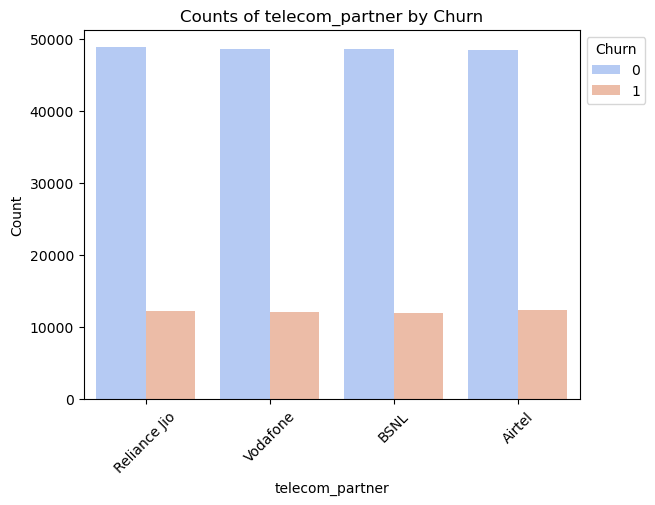

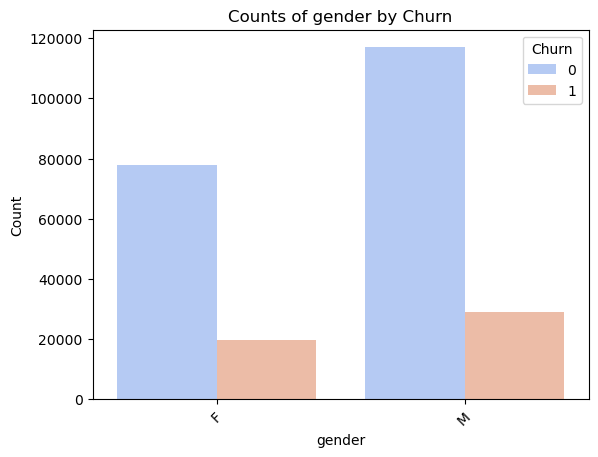

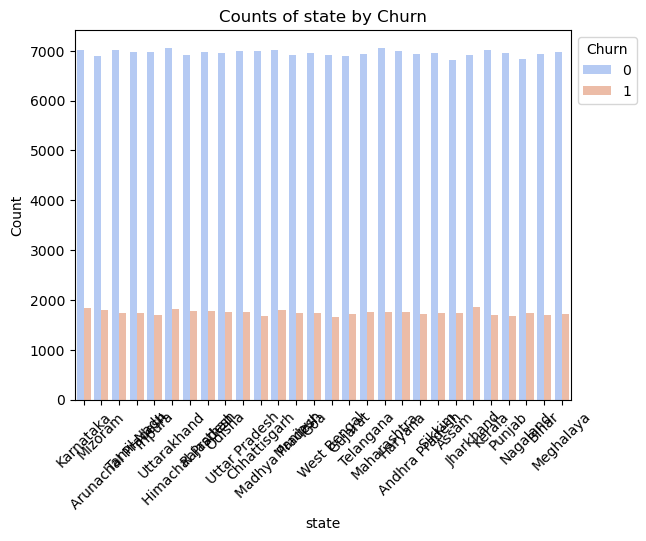

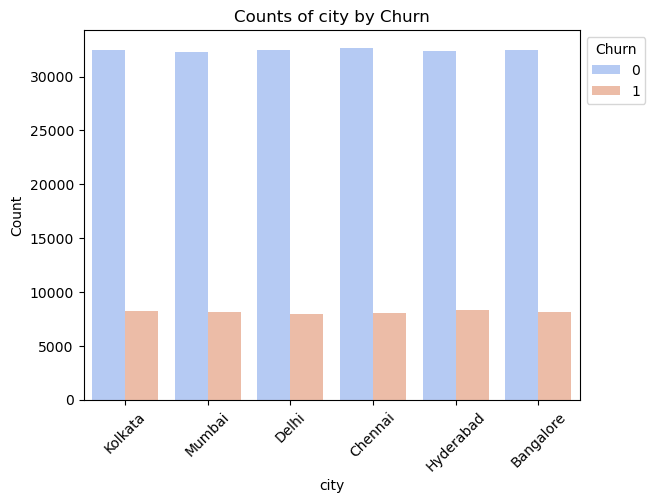

In [21]:
predictor_columns = df[['telecom_partner', 'gender',  'state', 'city']]
for predictor_column in predictor_columns:
    sns.countplot(data=df, x=predictor_column, hue='churn', palette='coolwarm')
    plt.xticks(rotation=45)
    plt.xlabel(predictor_column)
    plt.ylabel('Count')
    plt.title(f'Counts of {predictor_column} by Churn')
    plt.legend(title='Churn', bbox_to_anchor=(1, 1))
    plt.show()

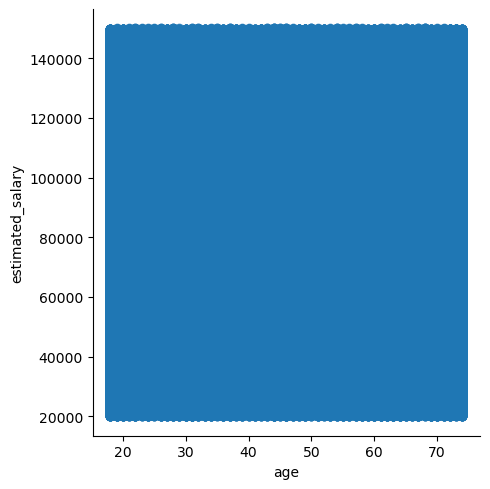

In [22]:
sns.lmplot(data = df, x = 'age', y = 'estimated_salary', fit_reg = False)

C:\Users\sohan\AppData\Local\Temp\ipykernel_2024\3183916512.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['churn'].sort_values(ascending = False).plot(kind = 'bar')


<Axes: >

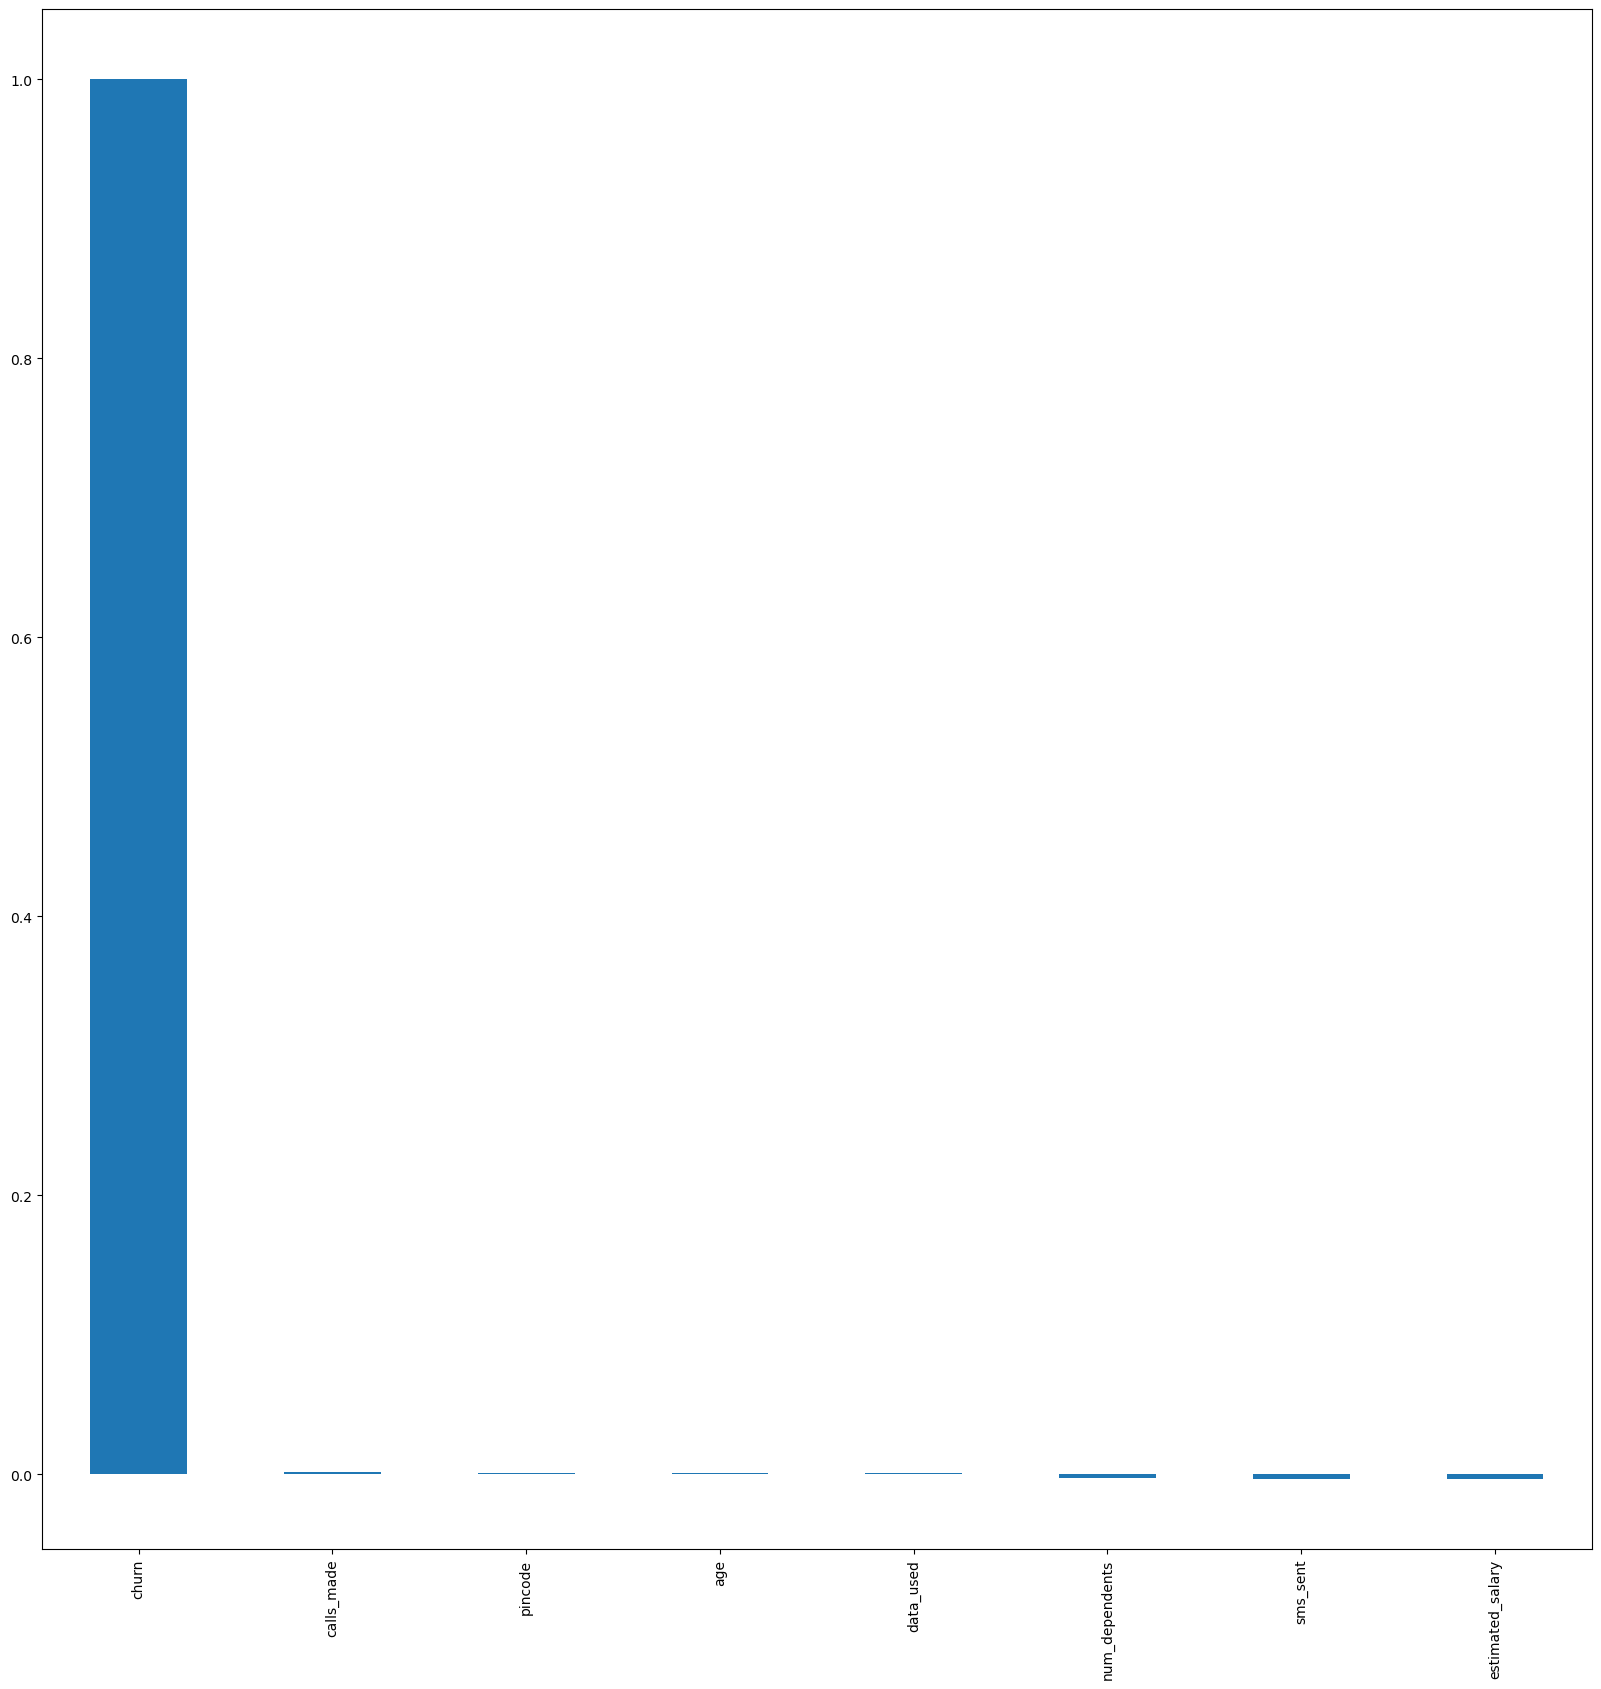

In [23]:
plt.figure(figsize = (20,20))
df.corr()['churn'].sort_values(ascending = False).plot(kind = 'bar')

In [24]:
telecom_partners = ['Reliance Jio', 'Vodafone', 'BSNL', 'Airtel']

# Calculate the churn count for each telecom partner
churn_counts = df[df['churn'] == 1]['telecom_partner'].value_counts()

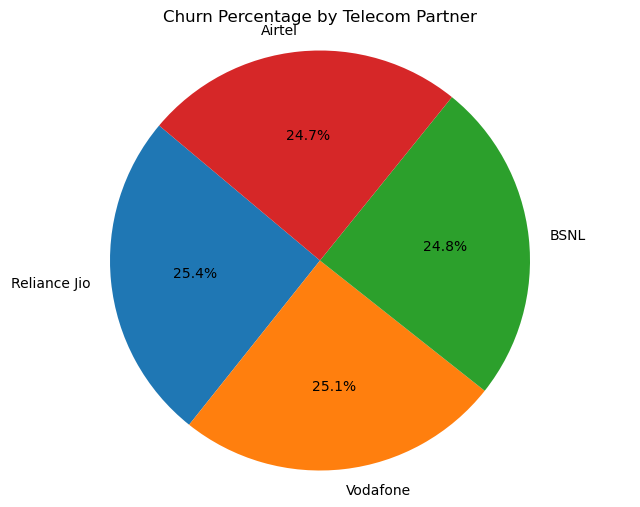

In [25]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=telecom_partners, autopct='%1.1f%%', startangle=140)
plt.title('Churn Percentage by Telecom Partner')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [28]:
df

,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,Reliance Jio,0,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,Reliance Jio,0,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,Vodafone,0,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,BSNL,1,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,BSNL,0,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,0,28,Mizoram,Kolkata,110295,2023-03-05,3,130580,28,9,4102,0
243549,Reliance Jio,0,52,Assam,Kolkata,713481,2023-03-05,0,82393,80,45,7521,0
243550,Reliance Jio,1,59,Tripura,Kolkata,520218,2023-03-05,4,51298,26,4,6547,0
243551,BSNL,1,49,Madhya Pradesh,Kolkata,387744,2023-03-05,2,83981,80,15,1125,0


In [29]:
# Group by 'gender' and calculate the number of churned customers for each gender
gender_churn_counts = df[df['churn'] == 1].groupby('gender')['churn'].count()


In [30]:
gender_churn_counts

gender
0    19805
1    29022
Name: churn, dtype: int64

In [31]:
gender = ['Male', 'Female']

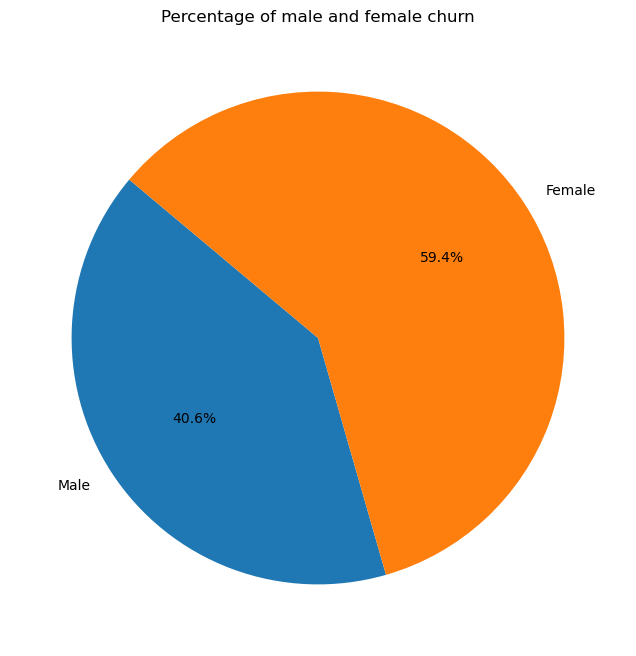

In [32]:
plt.figure(figsize = (10,8))
plt.pie(gender_churn_counts,labels = gender, autopct = '%1.1f%%', startangle = 140)
plt.title("Percentage of male and female churn")
plt.show()

As we can see that female has high churn percentage

In [33]:
state_churn_counts = df[df['churn'] == 1].groupby('state')['churn'].count()


In [34]:
state = df['state'].unique()
state

array(['Karnataka', 'Mizoram', 'Arunachal Pradesh', 'Tamil Nadu',
       'Tripura', 'Uttarakhand', 'Himachal Pradesh', 'Rajasthan',
       'Odisha', 'Uttar Pradesh', 'Chhattisgarh', 'Madhya Pradesh',
       'Manipur', 'Goa', 'West Bengal', 'Gujarat', 'Telangana',
       'Maharashtra', 'Haryana', 'Andhra Pradesh', 'Sikkim', 'Assam',
       'Jharkhand', 'Kerala', 'Punjab', 'Nagaland', 'Bihar', 'Meghalaya'],
      dtype=object)

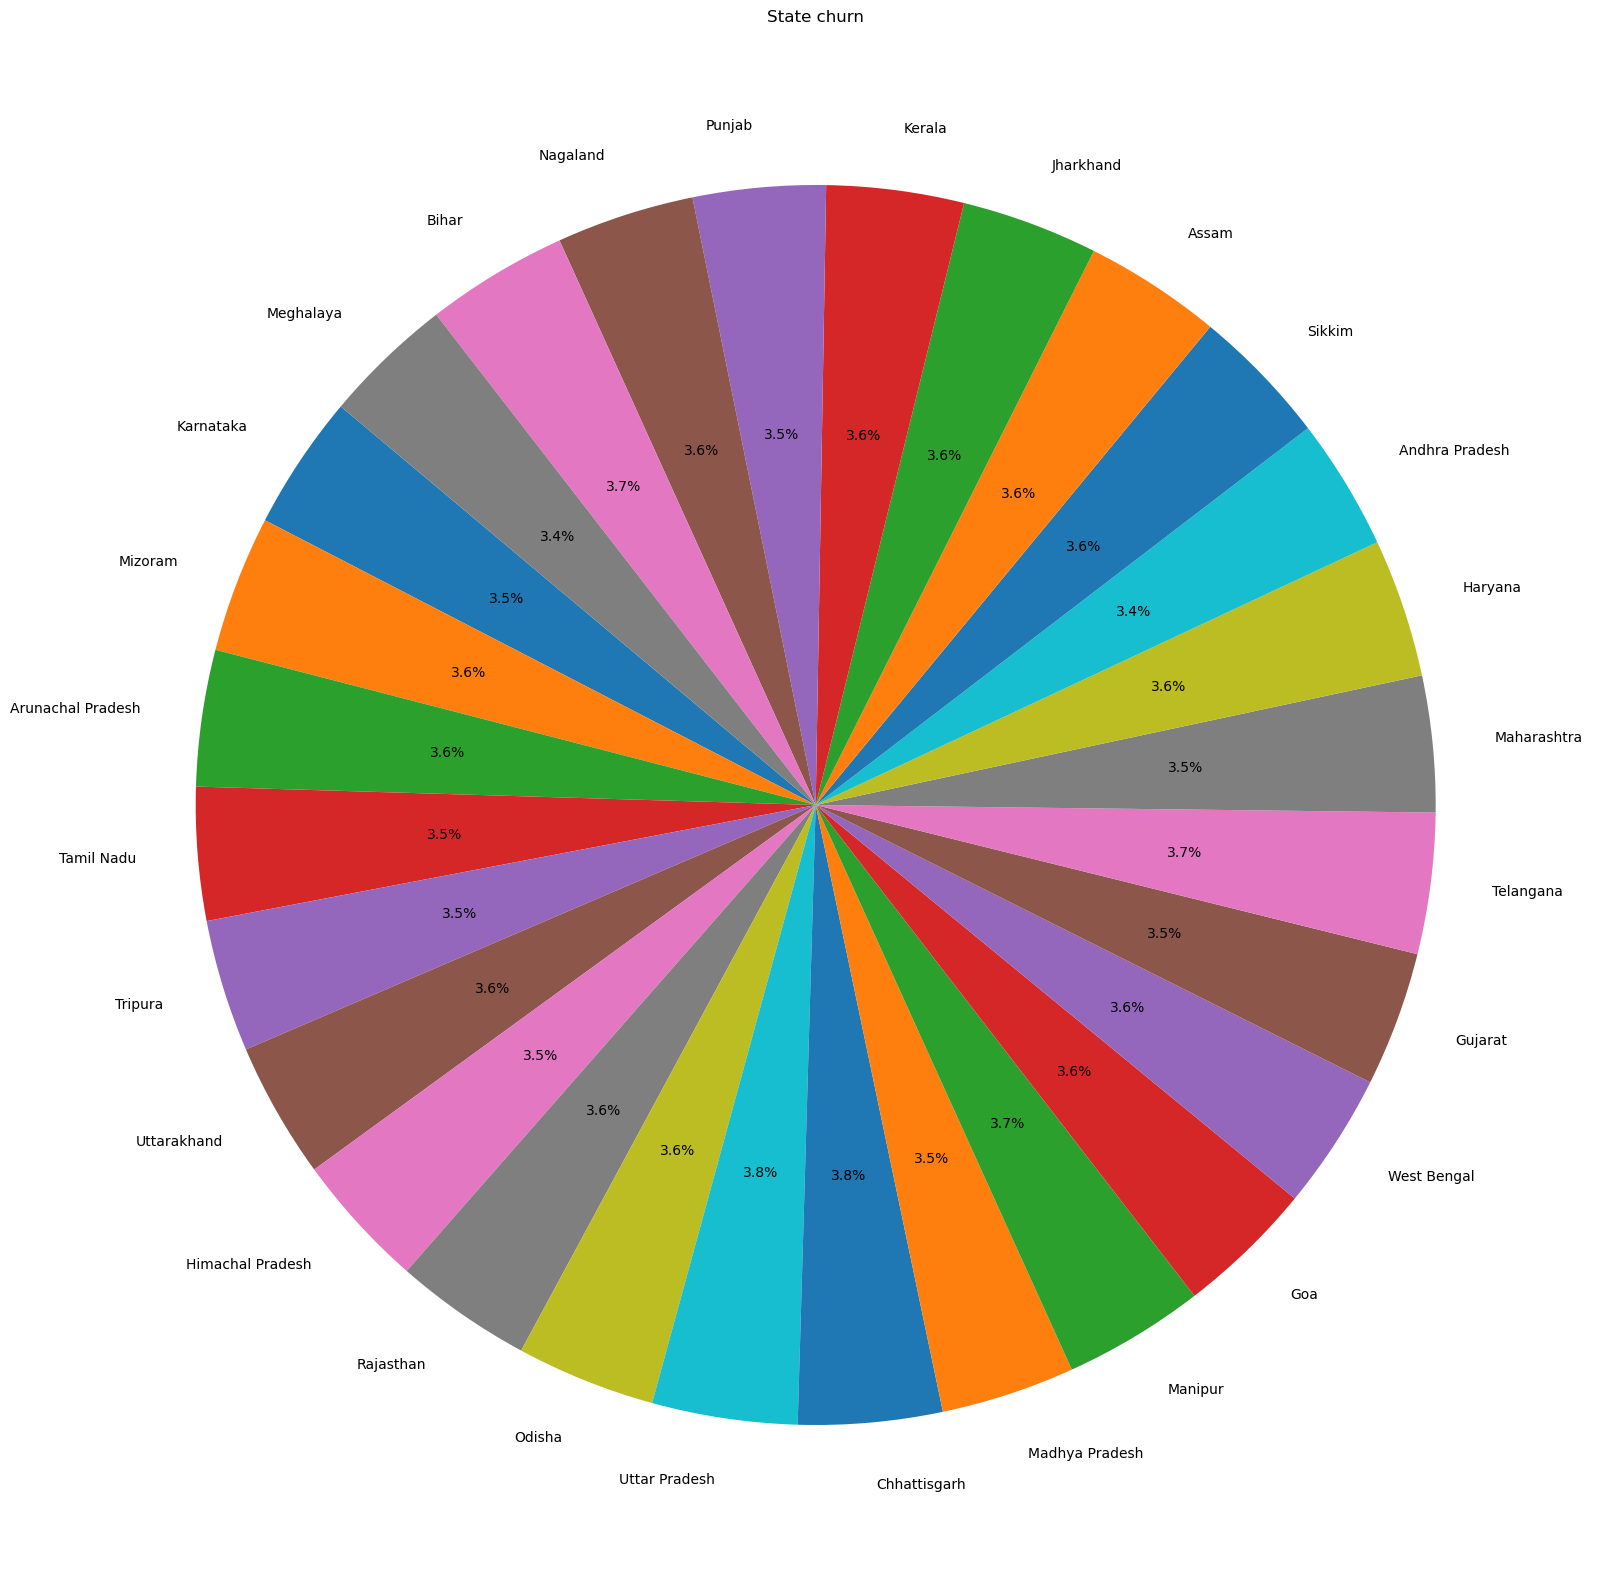

In [35]:
plt.figure(figsize = (20,30))
plt.pie(state_churn_counts, labels = state, autopct = '%1.1f%%', startangle = 140)
plt.title("State churn")
plt.show()

As we can see all the state have same churn percentage

In [36]:
city_churn_counts = df[df['churn'] == 1].groupby('city')['churn'].count()


In [37]:
city = df['city'].unique()
city

array(['Kolkata', 'Mumbai', 'Delhi', 'Chennai', 'Hyderabad', 'Bangalore'],
      dtype=object)

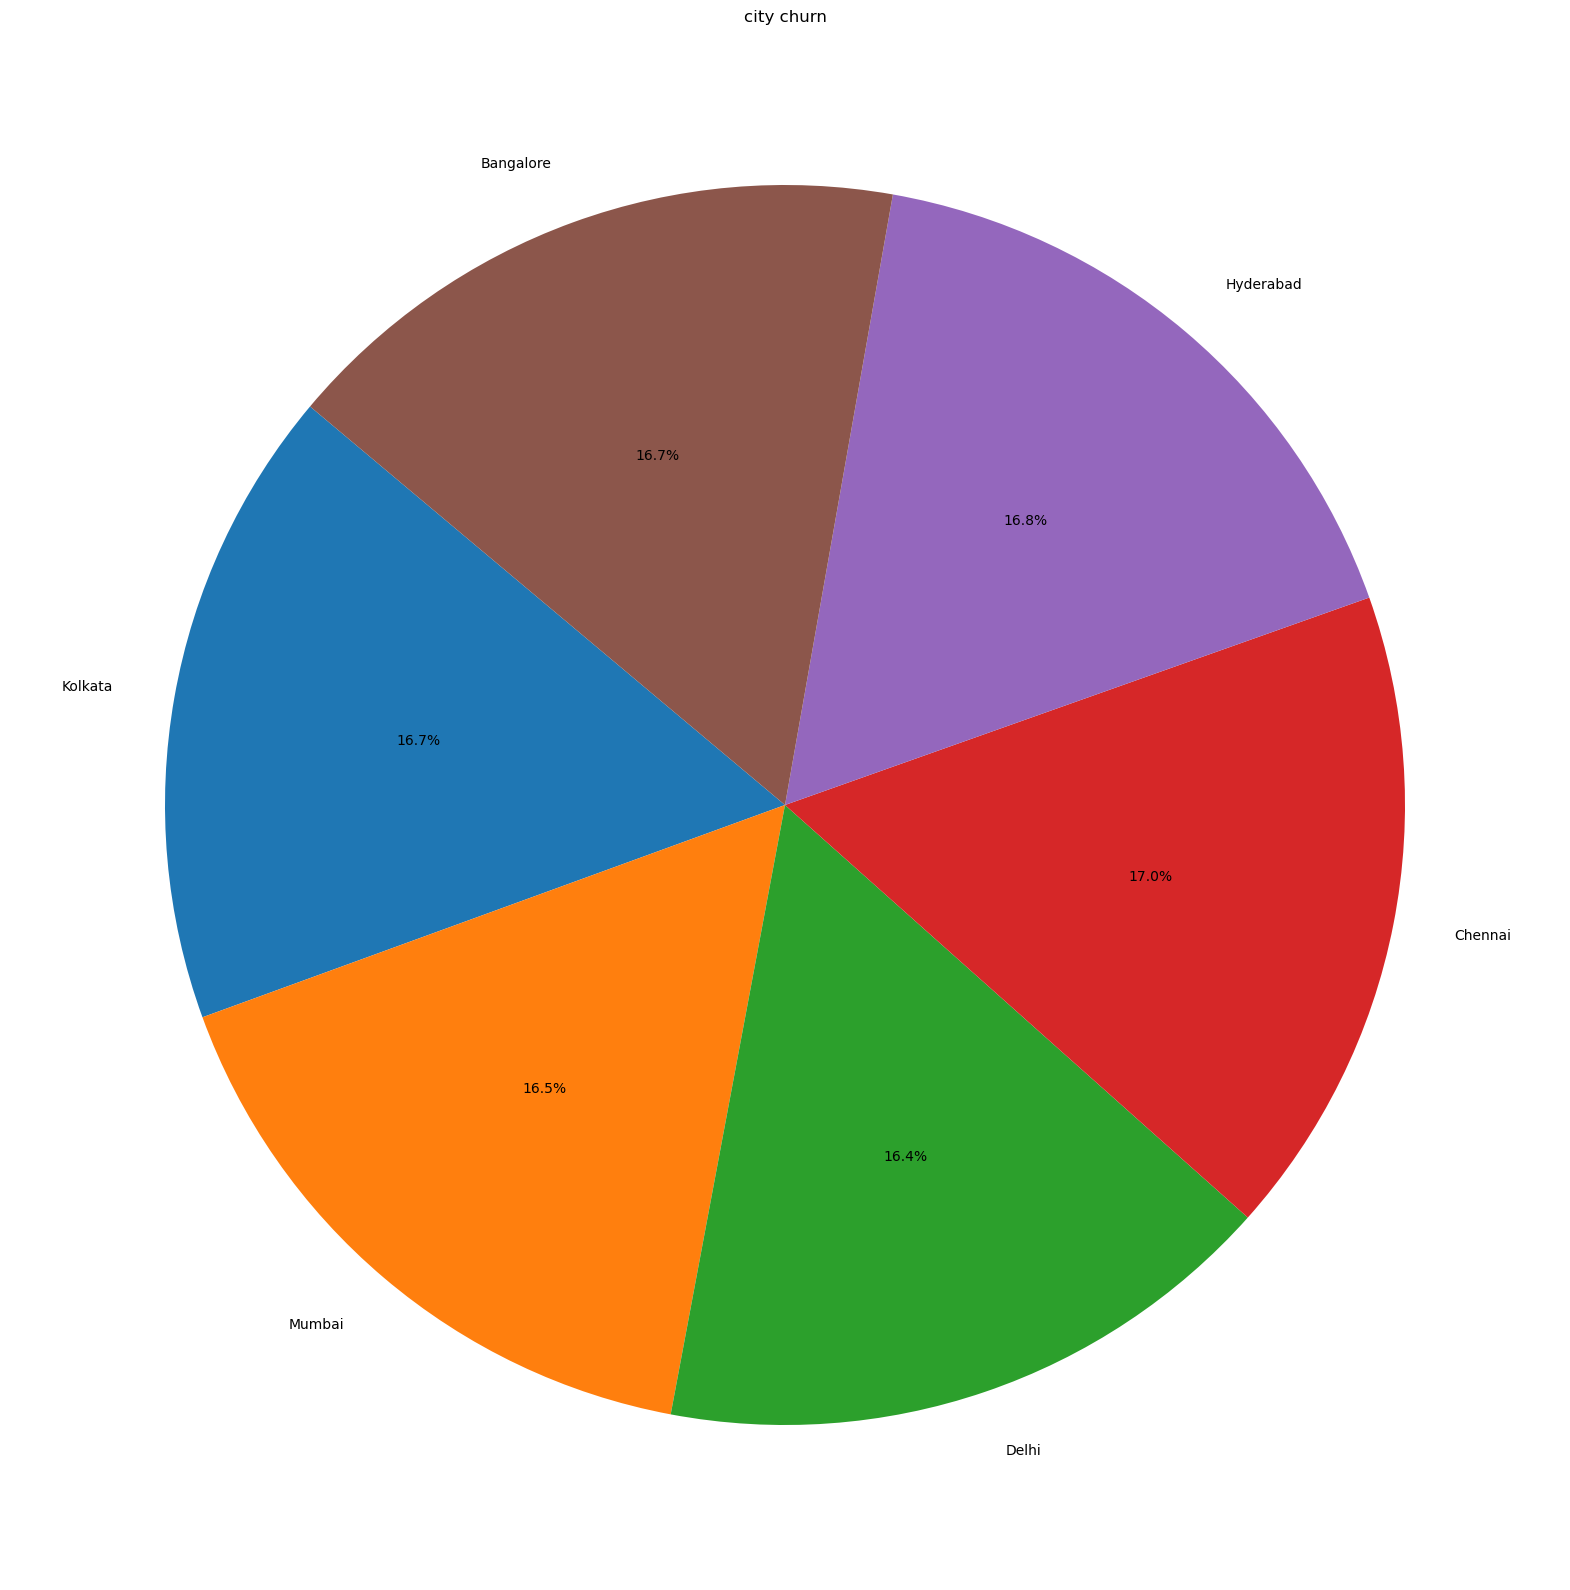

In [38]:
plt.figure(figsize = (20,30))
plt.pie(city_churn_counts, labels = city, autopct = '%1.1f%%', startangle = 140)
plt.title("city churn")
plt.show()

In [39]:
age_churn_counts = df[df['churn'] == 1].groupby('age')['churn'].count()

In [40]:
age = df['age'].unique()
age

array([25, 55, 57, 46, 26, 36, 60, 53, 44, 56, 64, 70, 38, 22, 61, 59, 47,
       58, 66, 71, 48, 20, 29, 73, 31, 62, 52, 69, 33, 42, 40, 30, 35, 28,
       49, 43, 18, 72, 39, 50, 34, 24, 74, 32, 68, 27, 65, 23, 37, 63, 19,
       21, 67, 51, 41, 45, 54], dtype=int64)

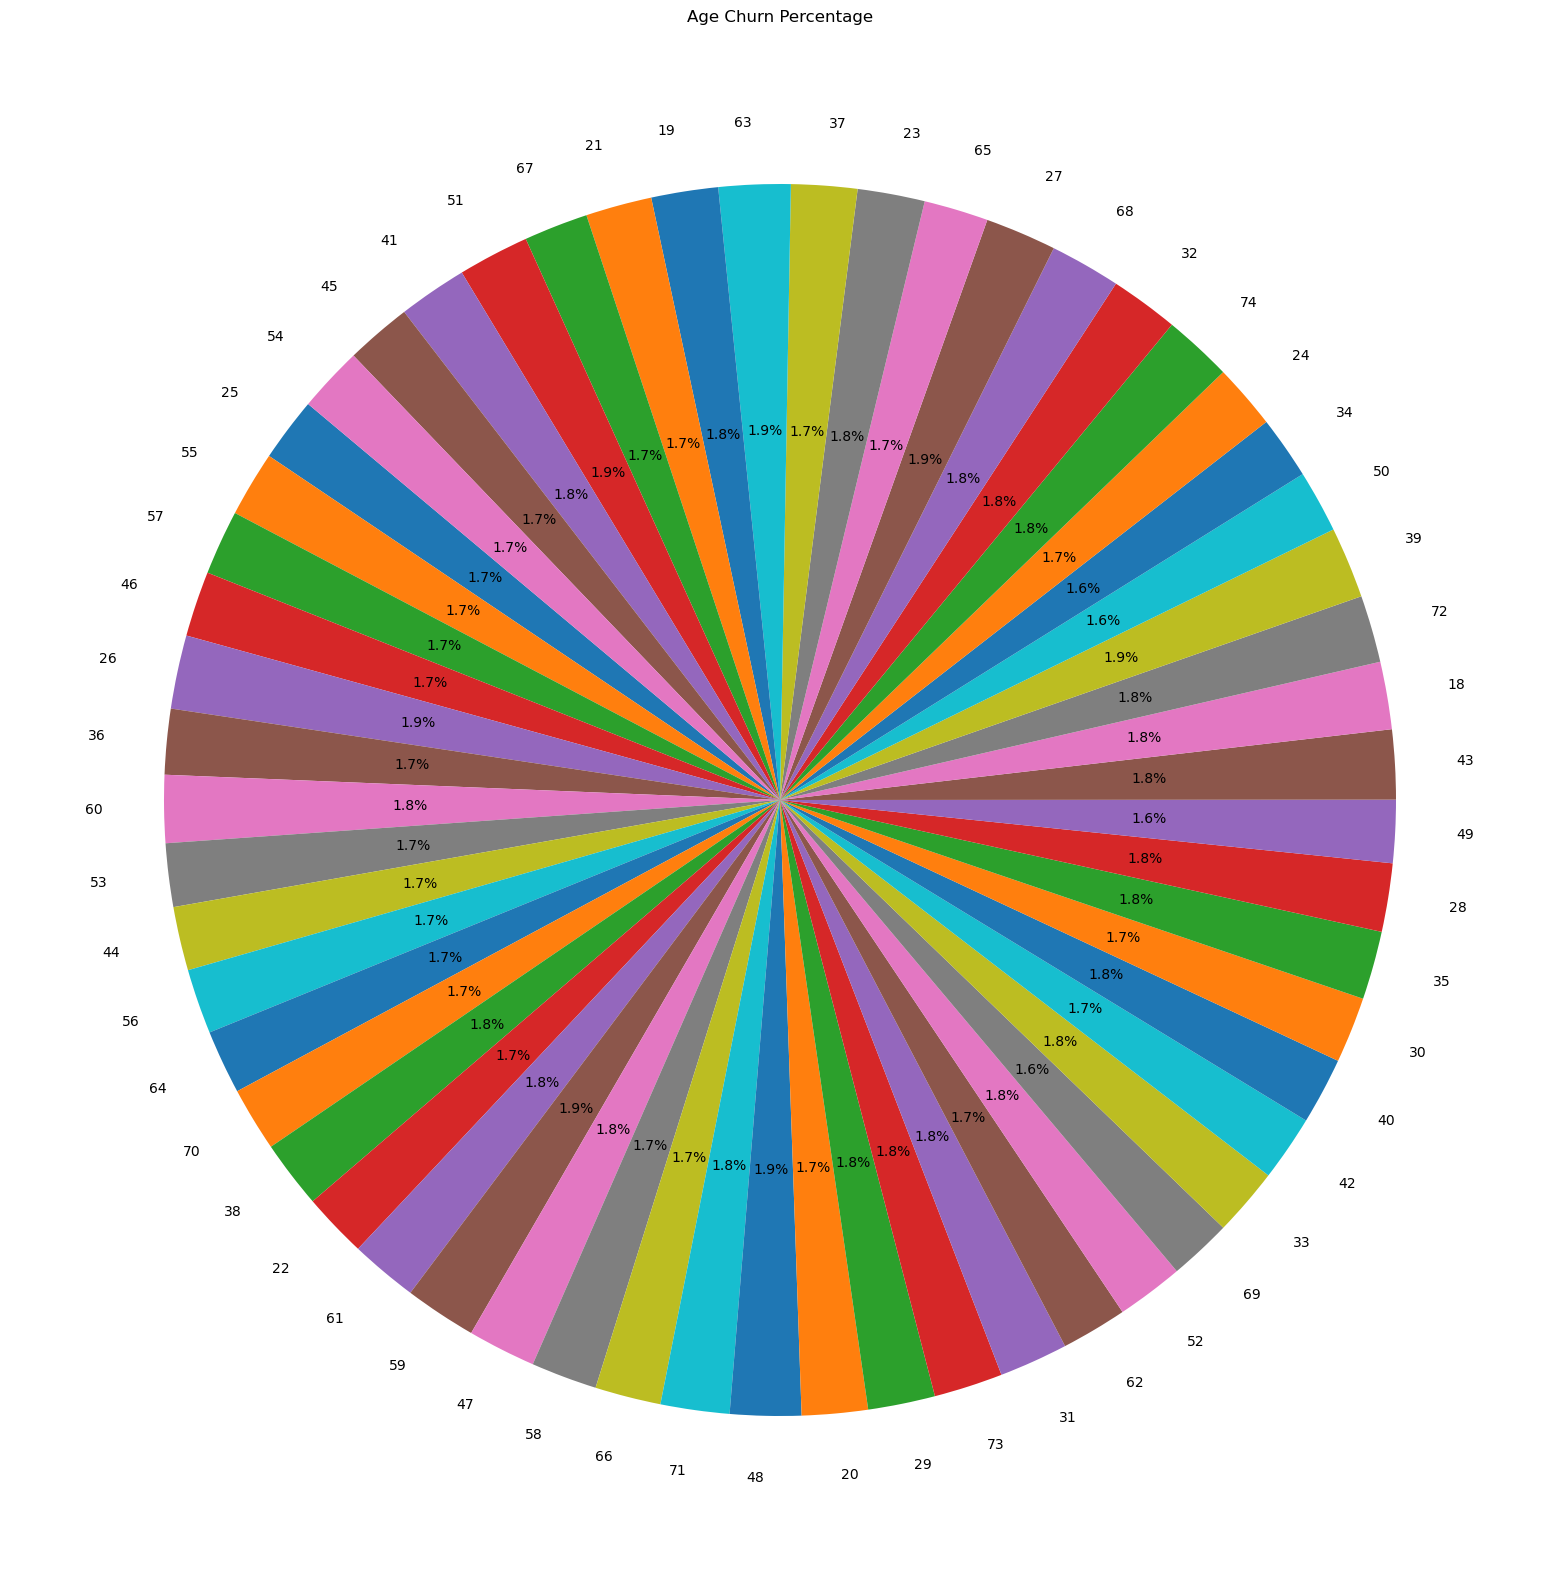

In [41]:
plt.figure(figsize = (20,20))
plt.pie(age_churn_counts, labels = age, autopct = '%1.1f%%', startangle = 140)
plt.title("Age Churn Percentage")
plt.show()

Text(0.5, 1.0, 'Age Churn Percentage')

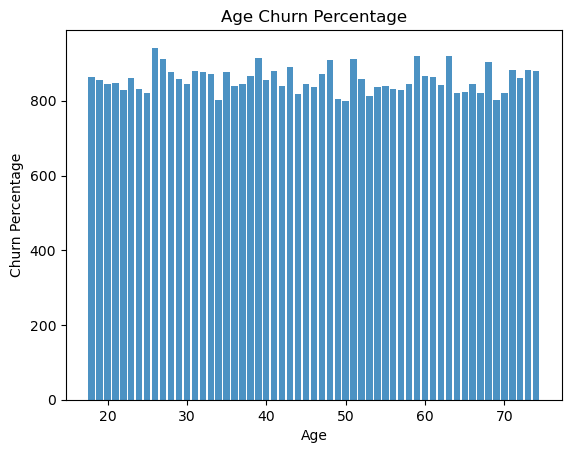

In [42]:
plt.bar(age, age_churn_counts, align='center', alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Churn Percentage')
plt.title('Age Churn Percentage')

In [43]:
nage=df[df['churn']==1]['age']
age=df[df['churn']==0]['age']

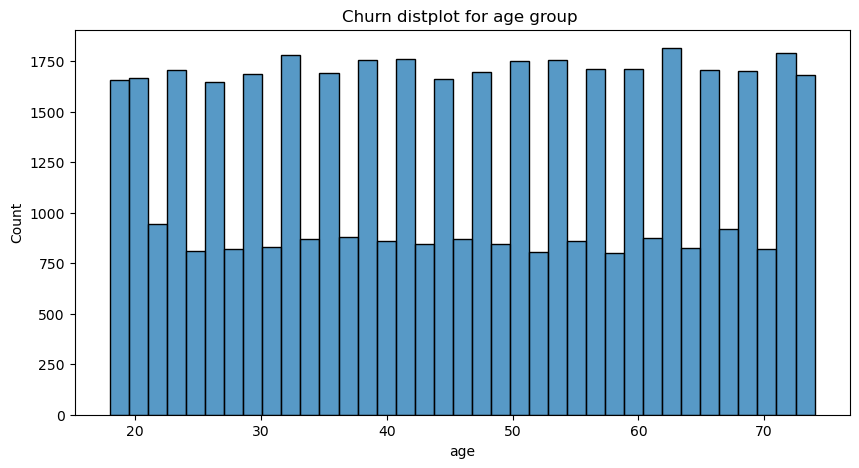

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(nage)
plt.title("Churn distplot for age group ")
plt.show()

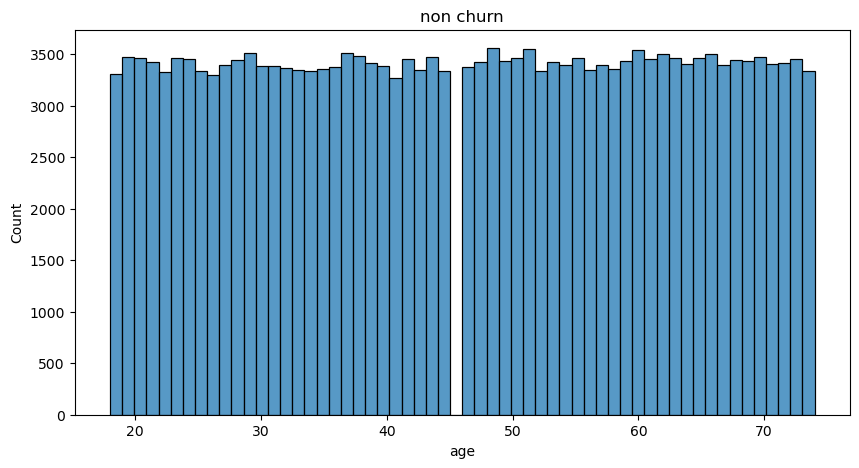

In [45]:
plt.figure(figsize = (10,5))
sns.histplot(age)
plt.title("non churn")
plt.show()

In [46]:
churn_salary = df[df['churn'] ==1]['estimated_salary']
Nonchurn_salary = df[df['churn'] ==0]['estimated_salary']

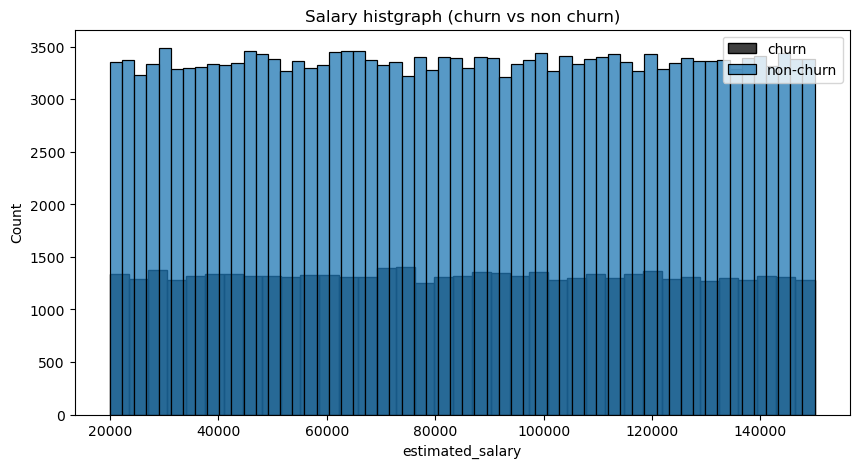

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(churn_salary,label="churn",color="black")
sns.histplot(Nonchurn_salary,label="non-churn")
plt.title("Salary histgraph (churn vs non churn)")
plt.legend()
plt.show()

In [48]:
churn_data_calls=df[df['churn']==1]['calls_made']
non_churn_calls=df[df['churn']==0]['calls_made']

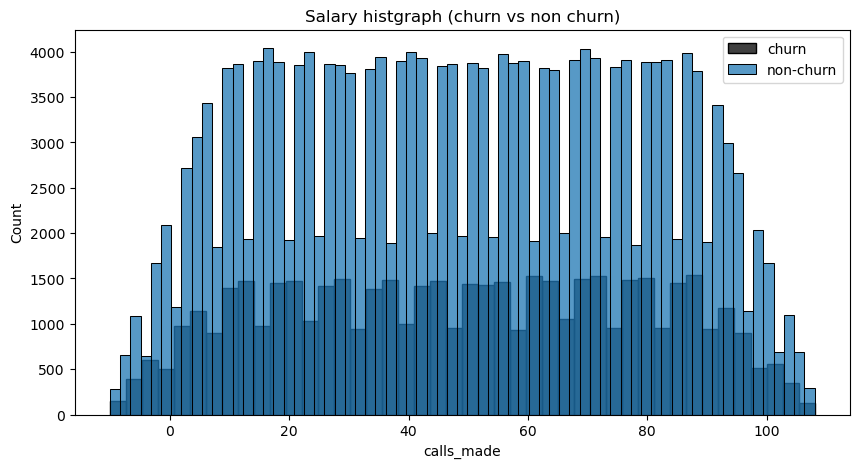

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(churn_data_calls,label="churn",color="black")
sns.histplot(non_churn_calls,label="non-churn")
plt.title("Salary histgraph (churn vs non churn)")
plt.legend()
plt.show()

As we can see non churn customers has made high number of calls

In [50]:
churn_data_used=df[df['churn']==1]['data_used']
non_churn_data_used=df[df['churn']==0]['data_used']

Text(0.5, 1.0, 'scatterplot data usage made churn  and non-churn customer')

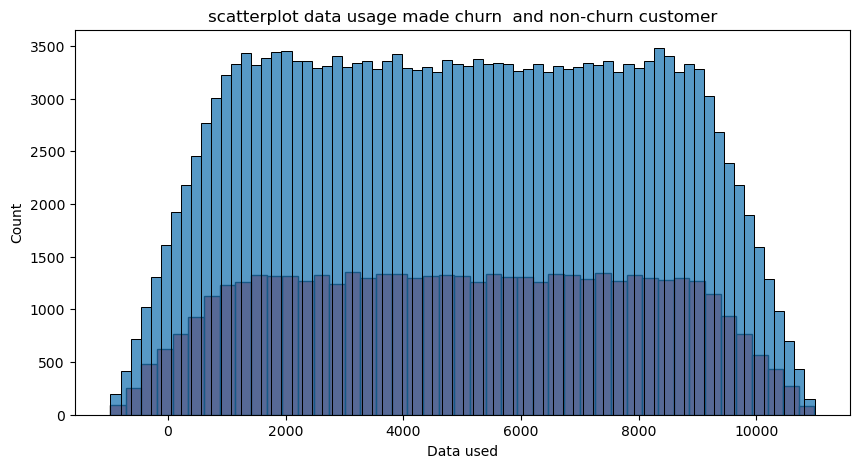

In [51]:

plt.figure(figsize=(10,5))
sns.histplot(churn_data_used,label="churn", color = "Red")
sns.histplot(non_churn_data_used,label="non churn")
plt.xlabel("Data used")
plt.title("scatterplot data usage made churn  and non-churn customer")

Non churn customers has used less amount of data as compared to the churn customers

In [52]:
df

,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,Reliance Jio,0,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,Reliance Jio,0,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,Vodafone,0,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,BSNL,1,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,BSNL,0,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,0,28,Mizoram,Kolkata,110295,2023-03-05,3,130580,28,9,4102,0
243549,Reliance Jio,0,52,Assam,Kolkata,713481,2023-03-05,0,82393,80,45,7521,0
243550,Reliance Jio,1,59,Tripura,Kolkata,520218,2023-03-05,4,51298,26,4,6547,0
243551,BSNL,1,49,Madhya Pradesh,Kolkata,387744,2023-03-05,2,83981,80,15,1125,0


C:\Users\sohan\AppData\Local\Temp\ipykernel_2024\2722736968.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


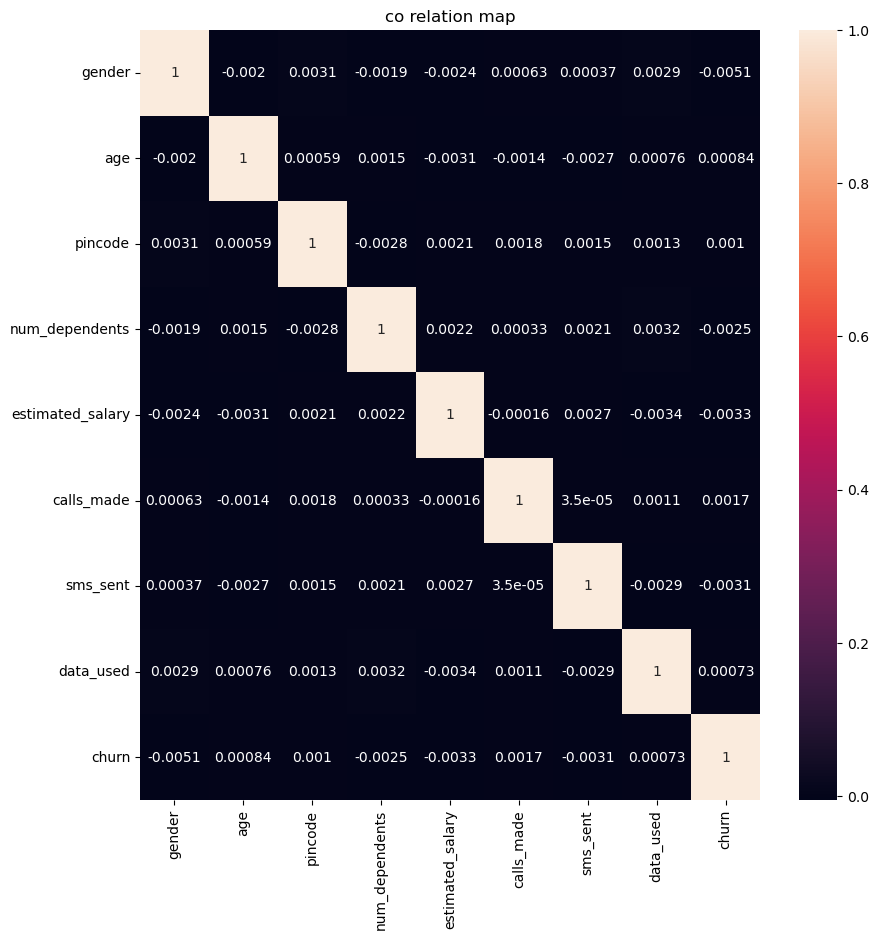

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title("co relation map")
plt.show()

None of the features is correlated

# One hotencoding


In [54]:
df_dummies = pd.get_dummies(df)
df_dummies

,gender,age,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,...,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,0,25,755597,2020-01-01,4,124962,44,45,-361,0,...,0,0,0,0,0,0,0,0,1,0
1,0,55,125926,2020-01-01,2,130556,62,39,5973,0,...,0,0,0,0,0,0,0,0,0,1
2,0,57,423976,2020-01-01,0,148828,49,24,193,1,...,0,0,0,0,0,0,1,0,0,0
3,1,46,522841,2020-01-01,1,38722,80,25,9377,1,...,0,0,0,0,0,0,0,0,1,0
4,0,26,740247,2020-01-01,2,55098,78,15,1393,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,0,28,110295,2023-03-05,3,130580,28,9,4102,0,...,0,0,0,0,0,0,0,0,1,0
243549,0,52,713481,2023-03-05,0,82393,80,45,7521,0,...,0,0,0,0,0,0,0,0,1,0
243550,1,59,520218,2023-03-05,4,51298,26,4,6547,0,...,1,0,0,0,0,0,0,0,1,0
243551,1,49,387744,2023-03-05,2,83981,80,15,1125,0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
df = df_dummies.copy()
df.columns

Index(['gender', 'age', 'pincode', 'date_of_registration', 'num_dependents',
       'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'churn',
       'telecom_partner_Airtel', 'telecom_partner_BSNL',
       'telecom_partner_Reliance Jio', 'telecom_partner_Vodafone',
       'state_Andhra Pradesh', 'state_Arunachal Pradesh', 'state_Assam',
       'state_Bihar', 'state_Chhattisgarh', 'state_Goa', 'state_Gujarat',
       'state_Haryana', 'state_Himachal Pradesh', 'state_Jharkhand',
       'state_Karnataka', 'state_Kerala', 'state_Madhya Pradesh',
       'state_Maharashtra', 'state_Manipur', 'state_Meghalaya',
       'state_Mizoram', 'state_Nagaland', 'state_Odisha', 'state_Punjab',
       'state_Rajasthan', 'state_Sikkim', 'state_Tamil Nadu',
       'state_Telangana', 'state_Tripura', 'state_Uttar Pradesh',
       'state_Uttarakhand', 'state_West Bengal', 'city_Bangalore',
       'city_Chennai', 'city_Delhi', 'city_Hyderabad', 'city_Kolkata',
       'city_Mumbai'],
      dtype='ob

C:\Users\sohan\AppData\Local\Temp\ipykernel_2024\3183916512.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['churn'].sort_values(ascending = False).plot(kind = 'bar')


<Axes: >

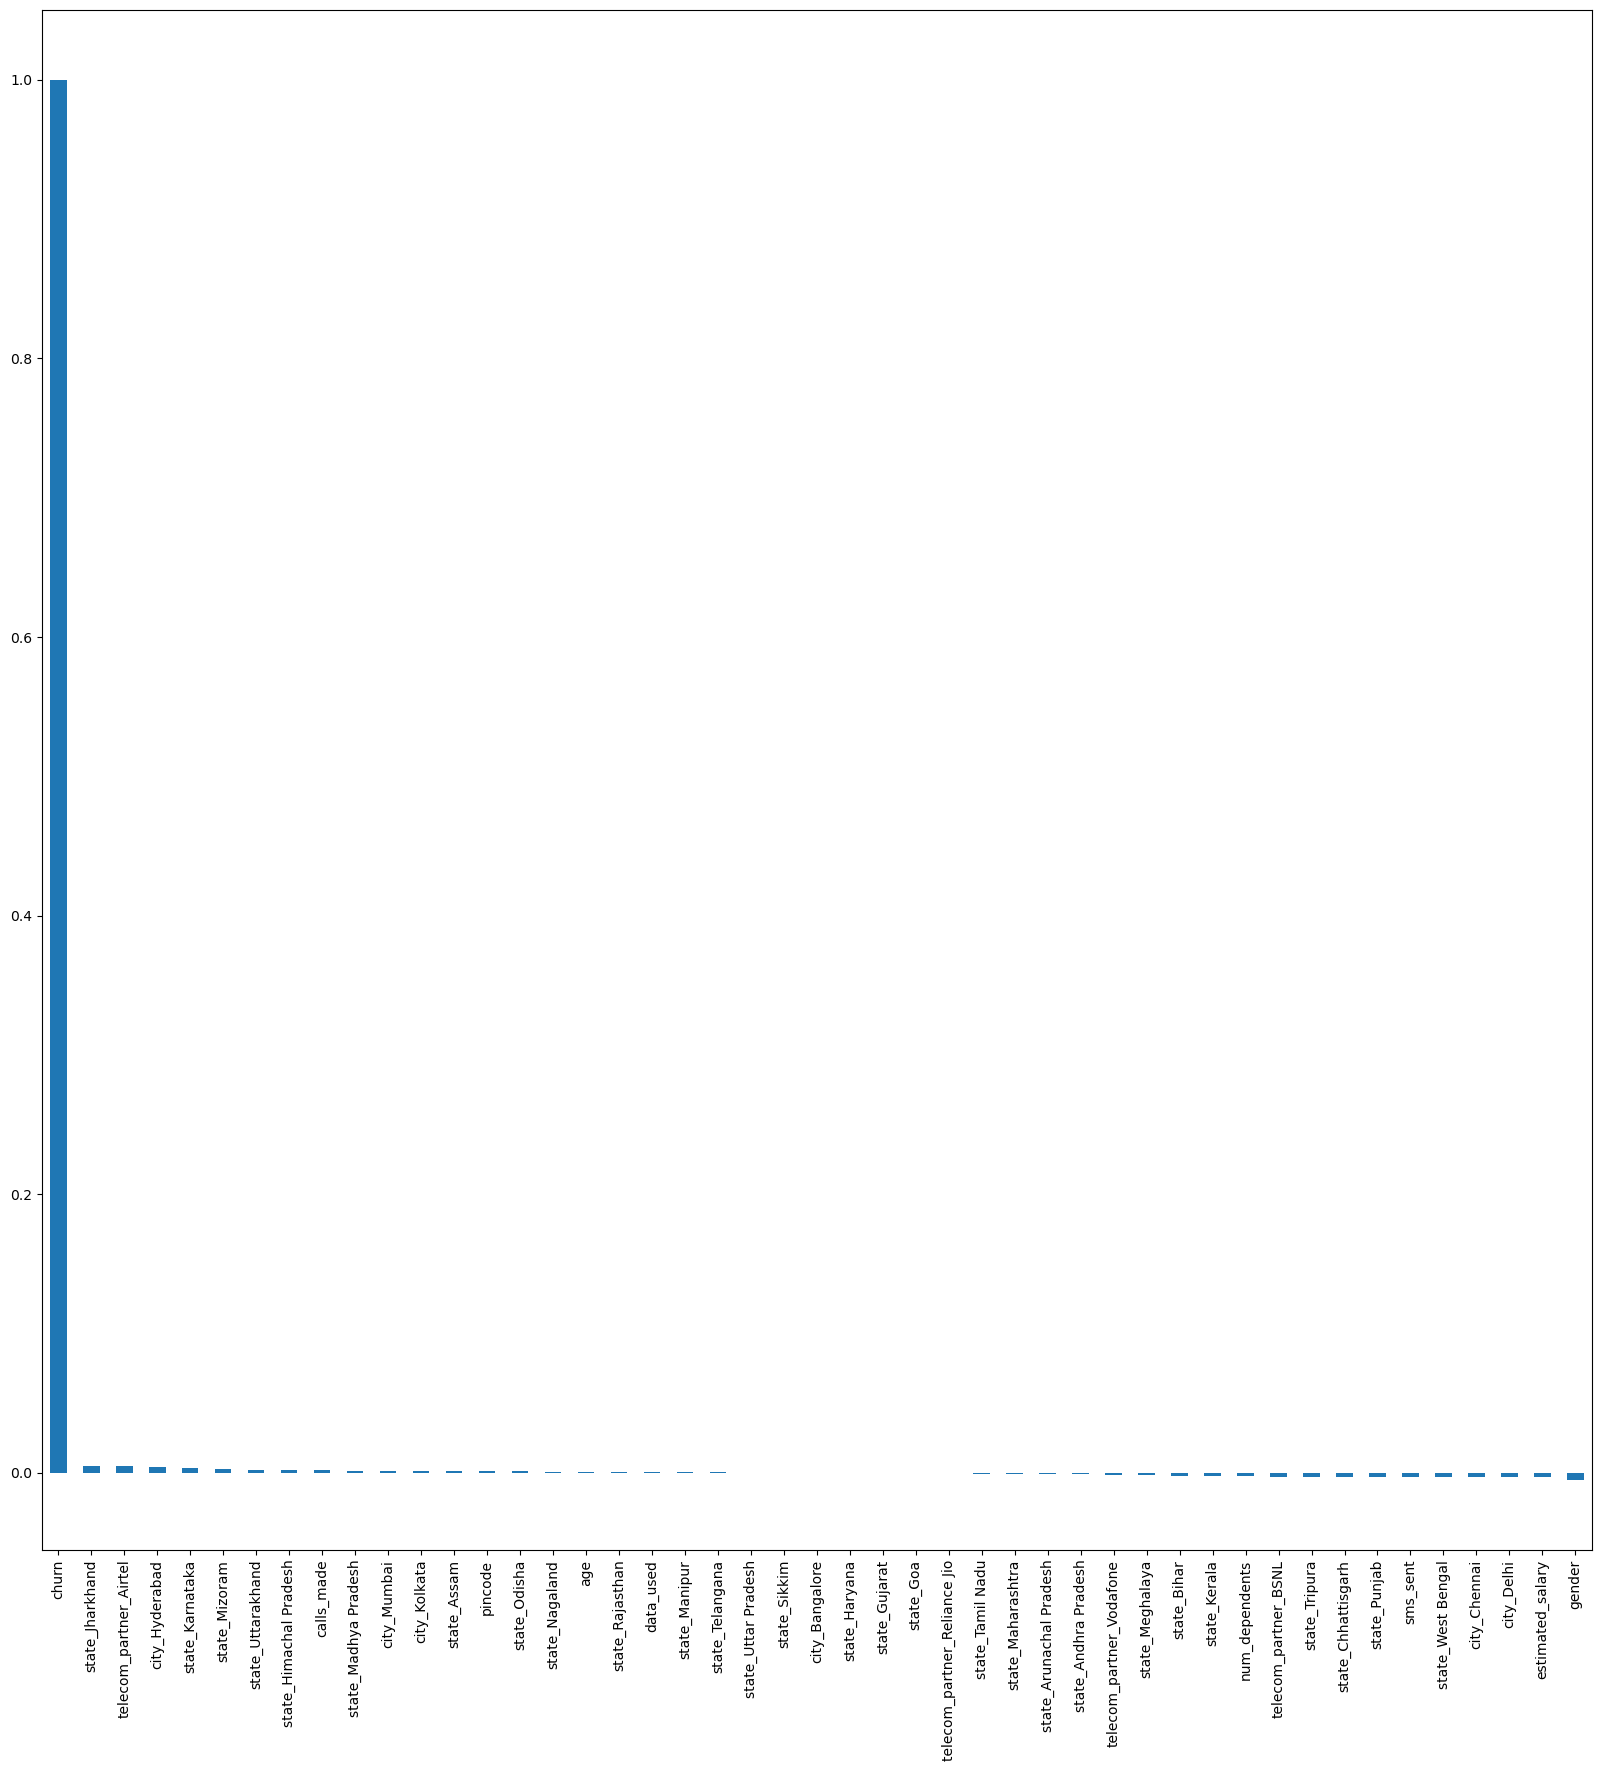

In [56]:
plt.figure(figsize = (20,20))
df.corr()['churn'].sort_values(ascending = False).plot(kind = 'bar')

calls made, pincode, age, data_used all these are reason that lead to churning
